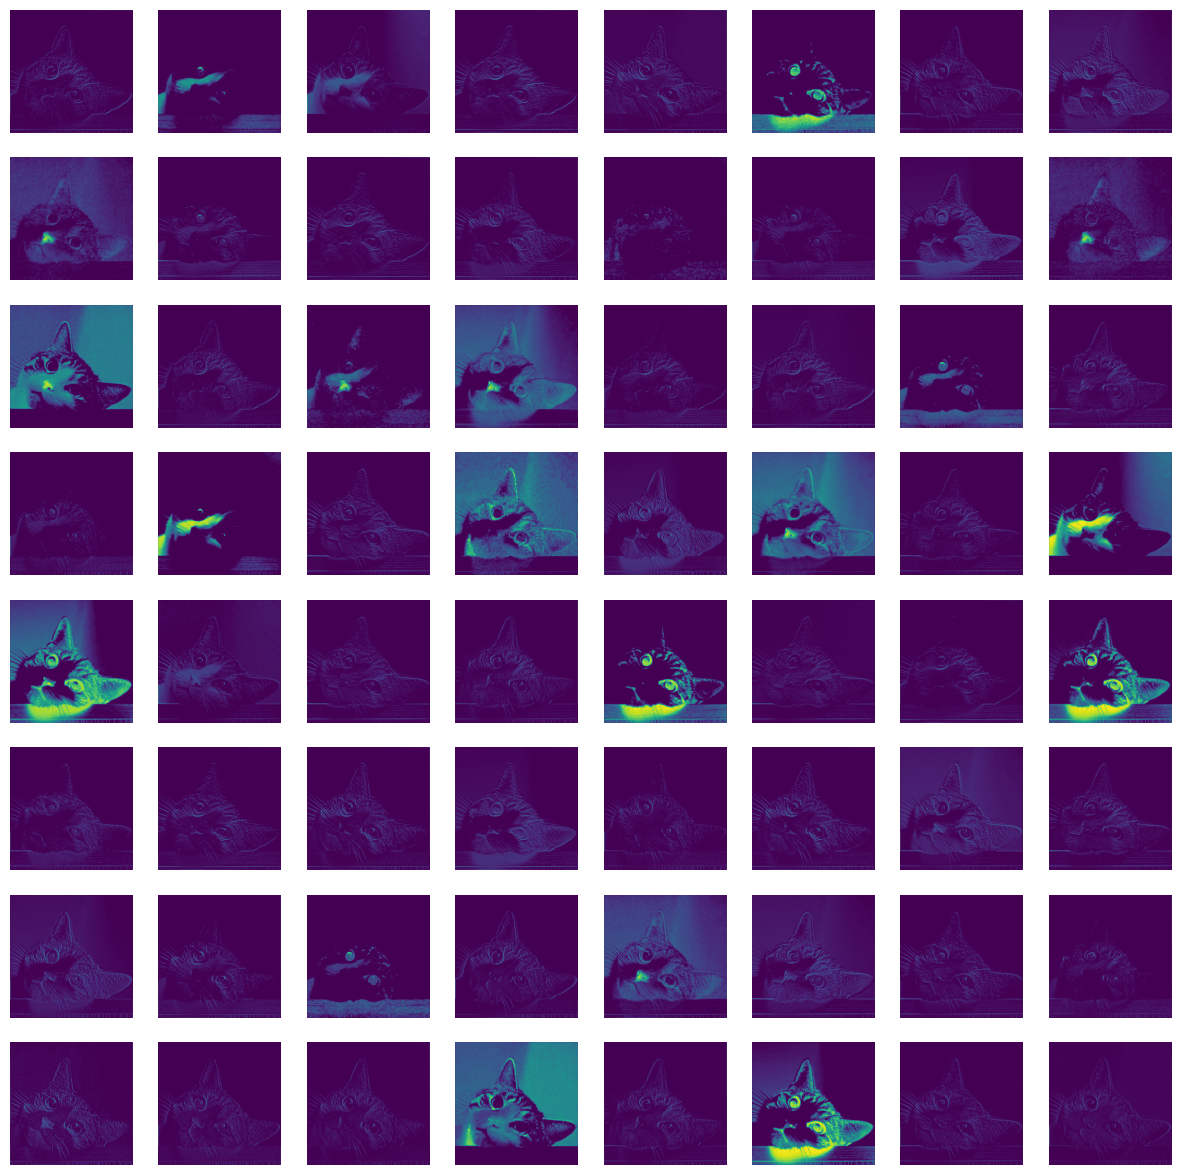

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from scipy import signal

# โหลด VGG16 Model
model = VGG16(weights='imagenet', include_top=False)
filters, bias = model.layers[1].get_weights()

# โหลดภาพ "nok.jpg" และทำ preprocessing
image = cv2.imread("catto.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = preprocess_input(image)

# ทำ convolution ด้วย filter kernels
def convolve_with_vgg_kernels(img):
    img_results = []
    for i in range(64):
        img_result = np.zeros_like(img)
        for channel in range(3):
            kernel = filters[:, :, channel, i]
            img_result[:, :, channel] = signal.convolve2d(img[:, :, channel], kernel, mode='same', boundary='fill', fillvalue=0)
        img_results.append(img_result)
    return img_results

def relu(x):
    return np.maximum(x, 0)

convolved_images = convolve_with_vgg_kernels(image)

# แสดงผลลัพธ์
fig, axs = plt.subplots(8, 8, figsize=(15, 15))
for i, ax in enumerate(axs.ravel()):
    combined_img = convolved_images[i][:, :, 0] + convolved_images[i][:, :, 1] + convolved_images[i][:, :, 2]
    combined_img = relu(combined_img)
    ax.imshow(combined_img, cmap='viridis')
    ax.axis('off')
plt.show()
